# Flux Balance Analysis (FBA)

This notebook serves as the foundation of a project aimed at predicting metabolic fluxes in biological systems. FBA involves constructing a mathematical model of the metabolic network that comprises a series of biochemical reactions converting various metabolites. Each reaction is assigned a rate or flux, representing the amount of reactants converted into products per unit time.

FBA utilizes a linear programming optimization approach to determine the optimal set of flux values that meet specified constraints, including substrate availability and the production of specific metabolites. The optimization objective is to maximize or minimize a specific function, such as the organism's growth rate or the desired metabolite's production.

Flux Balance Analysis (FBA) is numerical technique for simulating large metabolic networks at steady state. In this example, a flux balance model is loaded into Vivarium-Cobra from a BiGG file.

## Flux Balance Analysis Process using Cobra
A .BIG model loaded into a Vivarium-Cobra process and simulated. 

### BiGG File

A BiGG file is a file format used in the context of systems biology to represent genome-scale metabolic models. BiGG (short for Biochemically, Genetically, and Genomically structured) is a knowledgebase of metabolic reconstructions, which are large-scale mathematical models that describe the metabolism of an organism. These models capture the biochemical reactions, genes, and metabolites involved in the metabolism.

BiGG models are often saved in various file formats like SBML (Systems Biology Markup Language), JSON, or MATLAB format. These files can be used to simulate and analyze the behavior of metabolic networks, providing insights into cellular processes, metabolic engineering, and drug target identification.

The BiGG database contains well-curated, standardized, and organism-specific metabolic reconstructions. It serves as a valuable resource for researchers working in systems biology, metabolic modeling, and related fields. To access BiGG models, visit the official website at http://bigg.ucsd.edu/.


In [1]:
# required imports
from vivarium.plots.simulation_output import _save_fig_to_dir as save_fig_to_dir
import ast
from escher import Builder
%matplotlib inline
import matplotlib.pyplot as plt
from vivarium.plots.topology import plot_topology

In [2]:
# Import the FBA class and the main function from the Fba_process.py file
from Fba_process import FBA, main
# Set the desired model_path
model_path = "e_coli_core.xml"
# Call the main function with the
output, processes, topology = main(model_path)


Simulation ID: 6f22799c-e06f-11ed-ab12-ba21c95c07d9
Created: 04/21/2023 at 14:07:52
Completed in 0.003445 seconds


## Model Topology. 
#### The model compute the FBA and provide the optimized Fluxes, the Objective flux and the reactions. 

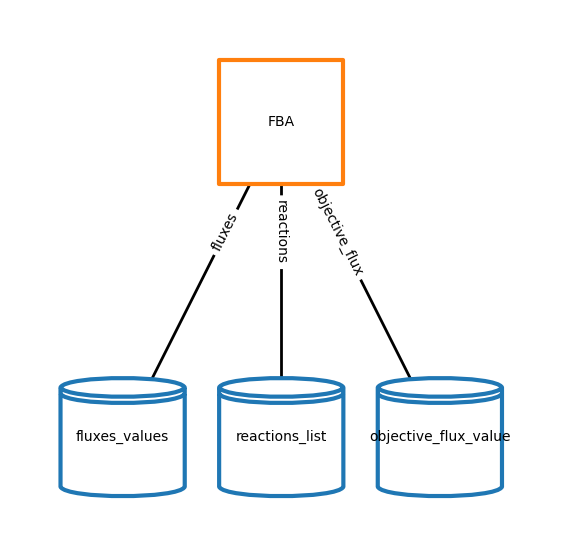

In [3]:
composite = {'processes' : processes , 'topology' : topology , 'steps' : {}, 'flow' : {}}
config ={'font_size' : 10}
fig_topology = plot_topology(composite, config)


In [4]:
# extract the fluxes data
if isinstance(output, str):
    # convert the string to a dictionary
    output = ast.literal_eval(output)
flux_data = output[1]['fluxes_values']
reactions_data = output[1]['reactions_list']
objective_flux_data = output[1]['objective_flux_value']

In [5]:
#Escher
# Load the E. coli core map
builder = Builder(
    map_name="e_coli_core.Core metabolism",     #user should choose it. 
    reaction_data=flux_data,
    show_gene_reaction_rules=False,
)

# Save the Escher plot as an HTML file
builder.save_html("escher_plot.html")

# To display the Escher plot in Jupyter Notebook, return the builder object
builder

Builder(reaction_data={'ACALD': 0.0, 'ACALDt': 0.0, 'ACKr': 1.0297466822596379e-15, 'ACONTa': 6.00724957535035…

In [6]:
from IPython.display import display, HTML
with open("escher_plot.html", "r") as file:
    html_content = file.read()

display(HTML(html_content))
